In [1]:
# Import necessary libraries
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, Flatten, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [2]:
# Constants
IMAGE_SIZE = (128,128)
BATCH_SIZE = 32
EPOCHS = 20
NUM_CLASSES = 3  # Normal + 2 types of keratitis

def load_image_data(image_dir, labels):
    images = []
    image_labels = []
    for label in labels:
        label_dir = os.path.join(image_dir, label)
        for img_file in os.listdir(label_dir):
            img_path = os.path.join(label_dir, img_file)
            # Skip directories or unreadable files
            if not os.path.isfile(img_path):
                continue
            try:
                img = tf.keras.preprocessing.image.load_img(img_path, target_size=IMAGE_SIZE)
                img_array = tf.keras.preprocessing.image.img_to_array(img)
                images.append(img_array)
                image_labels.append(label)
            except Exception as e:
                print(f"Error loading image {img_path}: {e}")
    images = np.array(images) / 255.0  # Normalize pixel values
    return images, image_labels

In [3]:
from tensorflow.keras.layers import GlobalAveragePooling2D
# Encode labels
def encode_labels(labels):
    label_encoder = LabelEncoder()
    encoded_labels = label_encoder.fit_transform(labels)
    return encoded_labels, label_encoder

# Define the CNN model
def build_cnn_model(input_shape, num_classes):
    inputs = Input(shape=input_shape)

    # First convolutional block
    x = Conv2D(32, (3, 3), activation='relu')(inputs)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)

    # Second convolutional block
    x = Conv2D(64, (3, 3), activation='relu')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)

    # Third convolutional block
    x = Conv2D(128, (3, 3), activation='relu')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)

    # Fully connected layers
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    # x = Dropout(0.5)(x)
    x = Dense(64, activation='relu')(x)
    # x = Dense(32, activation='selu')(x)

    # Output layer
    outputs = Dense(num_classes, activation='softmax')(x)

    # base_model = tf.keras.applications.EfficientNetB0(
    # input_shape=IMAGE_SIZE + (3,), 
    # include_top=False, 
    # weights='imagenet')
    # x = base_model.output
    # x = GlobalAveragePooling2D()(x)
    # x = Dense(128, activation='relu')(x)
    # x = Dropout(0.5)(x)
    # outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=outputs)
    
    return model

In [4]:
# Load dataset
image_dir = "C:\\Users\\prart\\Downloads\\FINAL DATASET\\FINAL DATASET"  # Update with your dataset path
labels = ["Fusarium Keratitis Mild", "Fusarium Keratitis Severe","No Keratitis"]

# # Load and preprocess data
images, image_labels = load_image_data(image_dir, labels)


unique_labels = set(image_labels)
print("Unique labels in image_labels:", unique_labels)

Unique labels in image_labels: {'Fusarium Keratitis Mild', 'No Keratitis', 'Fusarium Keratitis Severe'}


In [5]:
# Assuming encode_labels function works like LabelEncoder
encoded_labels, label_encoder = encode_labels(image_labels)

# Set the print option to ensure the entire list is printed
import numpy as np
np.set_printoptions(threshold=np.inf)  # Avoid truncation

# Now print the full list of encoded labels
print(encoded_labels)
print(label_encoder)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

LabelEncoder()


In [6]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    images, encoded_labels, test_size=0.2, random_state=42, stratify=encoded_labels
)

# One-hot encode labels
y_train = to_categorical(y_train, num_classes=NUM_CLASSES)
y_test = to_categorical(y_test, num_classes=NUM_CLASSES)

In [7]:
# datagen = ImageDataGenerator(
#     rotation_range=30,
#     width_shift_range=0.3,
#     height_shift_range=0.3,
#     shear_range=0.3,
#     zoom_range=0.3,
#     horizontal_flip=True,
#     fill_mode='nearest',
#     brightness_range=[0.8, 1.2],  # Random brightness adjustment
#     channel_shift_range=30        # Random channel shift for color
# )
# datagen.fit(X_train)

In [12]:
from tensorflow.keras.optimizers import Adam

# Build the model
model = build_cnn_model(input_shape=IMAGE_SIZE + (3,), num_classes=NUM_CLASSES)

optimizer = Adam(learning_rate=0.001)

# Compile the model
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    X_train, y_train, batch_size=BATCH_SIZE,
    validation_data=(X_test, y_test),
    epochs=EPOCHS,
    steps_per_epoch=len(X_train) // BATCH_SIZE
)

Epoch 1/20
116/116 ━━━━━━━━━━━━━━━━━━━━ 97s 783ms/step - accuracy: 0.4530 - loss: 2.9999 - val_accuracy: 0.4135 - val_loss: 7.0980
Epoch 2/20
  1/116 ━━━━━━━━━━━━━━━━━━━━ 31s 273ms/step - accuracy: 0.3333 - loss: 1.6534

C:\Users\KRISHA\anaconda3\envs\viralkeratitis\lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


116/116 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.3333 - loss: 1.6534 - val_accuracy: 0.4135 - val_loss: 6.7524
Epoch 3/20
116/116 ━━━━━━━━━━━━━━━━━━━━ 86s 745ms/step - accuracy: 0.5641 - loss: 1.0201 - val_accuracy: 0.2707 - val_loss: 2.0173
Epoch 4/20
116/116 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.6667 - loss: 0.6369 - val_accuracy: 0.2707 - val_loss: 2.0860
Epoch 5/20
116/116 ━━━━━━━━━━━━━━━━━━━━ 86s 742ms/step - accuracy: 0.6742 - loss: 0.7496 - val_accuracy: 0.3598 - val_loss: 1.3626
Epoch 6/20
116/116 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - accuracy: 0.4444 - loss: 1.7021 - val_accuracy: 0.3469 - val_loss: 1.3561
Epoch 7/20
116/116 ━━━━━━━━━━━━━━━━━━━━ 95s 819ms/step - accuracy: 0.7177 - loss: 0.6997 - val_accuracy: 0.3942 - val_loss: 1.4325
Epoch 8/20
116/116 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.5556 - loss: 0.8501 - val_accuracy: 0.3974 - val_loss: 1.4113
Epoch 9/20
116/116 ━━━━━━━━━━━━━━━━━━━━ 88s 754ms/step - accuracy: 0.7896 - loss: 0.5132 - val_accurac

30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 202ms/step - accuracy: 0.6781 - loss: 1.3866
Test Accuracy: 66.38%
117/117 ━━━━━━━━━━━━━━━━━━━━ 15s 128ms/step - accuracy: 0.9371 - loss: 0.1633
Train Accuracy: 93.44%
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 126ms/step
                           precision    recall  f1-score   support

  Fusarium Keratitis Mild       0.63      0.94      0.75       385
Fusarium Keratitis Severe       0.65      0.50      0.56       267
             No Keratitis       0.79      0.45      0.57       279

                 accuracy                           0.66       931
                macro avg       0.69      0.63      0.63       931
             weighted avg       0.69      0.66      0.65       931



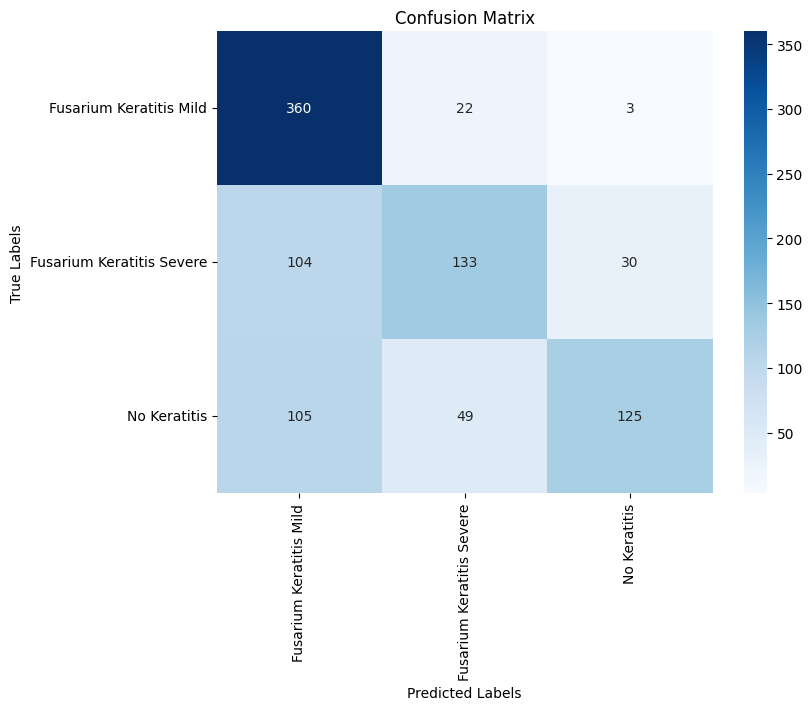

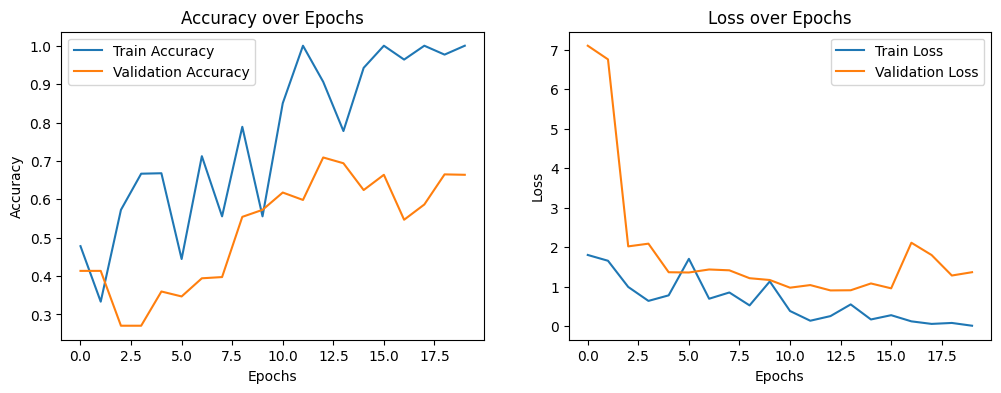

In [29]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

train_loss, train_accuracy = model.evaluate(X_train, y_train)
print(f"Train Accuracy: {train_accuracy * 100:.2f}%")

# Classification report
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)
print(classification_report(y_true_classes, y_pred_classes, target_names=labels))

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

# Add labels and title
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Plot training history
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [14]:
# # Save the model to a file
# model.save('my_keras_model.h5')  # Save as HDF5 file

In [15]:
from sklearn.metrics import roc_auc_score, roc_curve

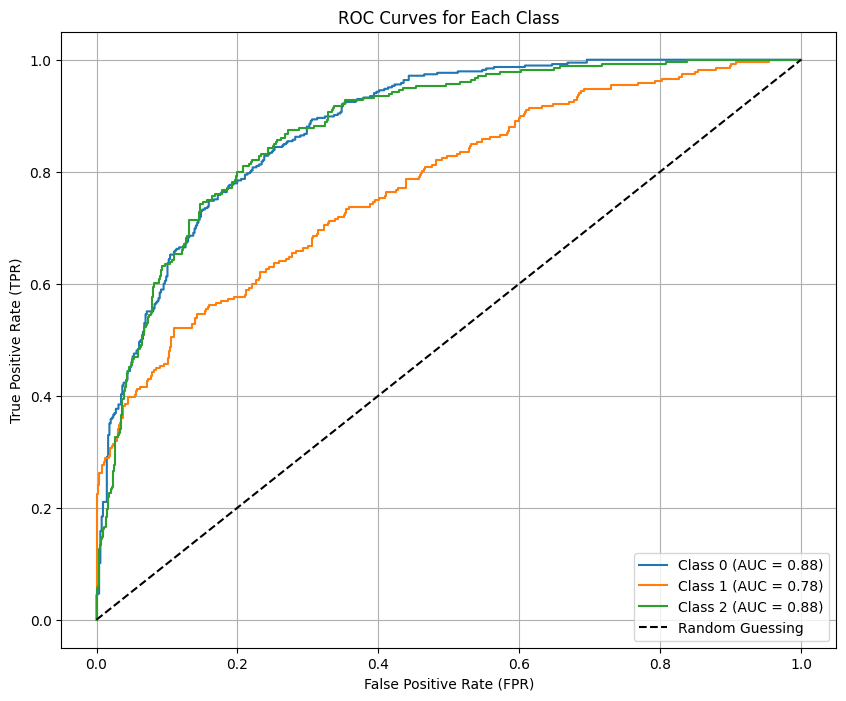

In [16]:
# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(NUM_CLASSES):
    fpr, tpr, _ = roc_curve(y_test[:, i], y_pred[:, i])
    auc = roc_auc_score(y_test[:, i], y_pred[:, i])
    plt.plot(fpr, tpr, label=f"Class {i} (AUC = {auc:.2f})")

# Plot diagonal line for random guessing
plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing")

# Customize the plot
plt.title("ROC Curves for Each Class")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc="lower right")
plt.grid()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


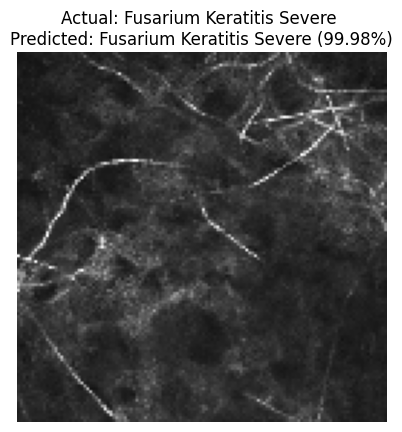

Example Image 0: Actual Class - Fusarium Keratitis Severe, Predicted Class - Fusarium Keratitis Severe (Confidence: 99.98%)


In [21]:
import numpy as np
# Predicting on a single example from x_test
example_index = 0  # Change index as needed
example_image = np.expand_dims(X_test[example_index], axis=0)
example_prediction = model.predict(example_image)
predicted_class = np.argmax(example_prediction, axis=1)[0]
predicted_label = label_encoder.inverse_transform([predicted_class])[0]

# Display the image
plt.imshow(X_test[example_index])
plt.axis("off")

# Convert one-hot encoded y_test to class index
actual_class = np.argmax(y_test[example_index])
actual_label = label_encoder.inverse_transform([actual_class])[0]

plt.title(f"Actual: {actual_label} \nPredicted: {predicted_label} ({np.max(example_prediction) * 100:.2f}%)")
plt.show()

print(f"Example Image {example_index}: Actual Class - {actual_label}, Predicted Class - {predicted_label} (Confidence: {np.max(example_prediction) * 100:.2f}%)")


In [6]:
from tensorflow.keras.models import load_model

saved_model = load_model("C:\\Users\\prart\\Downloads\\my_keras_model.h5")

TypeError: Error when deserializing class 'InputLayer' using config={'batch_shape': [None, 128, 128, 3], 'dtype': 'float32', 'sparse': False, 'name': 'input_layer_1'}.

Exception encountered: Unrecognized keyword arguments: ['batch_shape']

In [3]:
# Evaluate the model
test_loss, test_accuracy = saved_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

train_loss, train_accuracy = saved_model.evaluate(X_train, y_train)
print(f"Train Accuracy: {train_accuracy * 100:.2f}%")

NameError: name 'X_test' is not defined

In [4]:
def predict_example_image(saved_model, image_path, label_encoder):
    """
    Predict the class of a single image using the trained model and display the image.
    """
    IMAGE_SIZE = (128, 128)
    
    # Load and preprocess image
    img = load_img(image_path, target_size=IMAGE_SIZE)
    img_array = img_to_array(img) / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    
    # Make prediction
    prediction = saved_model.predict(img_array)
    predicted_class = np.argmax(prediction, axis=1)[0]
    class_label = label_encoder.inverse_transform([predicted_class])[0]
    
    # Display the image
    plt.imshow(img)
    plt.axis('off')  # Hide axis
    plt.title(f"Predicted Class: {class_label} (Confidence: {np.max(prediction) * 100:.2f}%)")
    plt.show()
    
    return class_label

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
from sklearn.preprocessing import LabelEncoder
results = predict_example_image(saved_model, "C:\\Users\\KRISHA\\OneDrive - National Institute of Technology Karnataka, Surathkal\\Documents\\ASAN FREELANCING\\Viral Keratitis\\FINAL DATASET\\Fusarium Keratitis Severe\\Fusarium_severe_C_2019.02.01-OS_57.jpg", label_encoder)

NameError: name 'label_encoder' is not defined

# New 

In [7]:
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, Flatten, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
IMAGE_SIZE = (128, 128)
BATCH_SIZE = 32
EPOCHS = 20
NUM_CLASSES = 4  # Normal + 2 types of keratitis + Other class

In [9]:
def load_image_data(image_dir, labels):
    images = []
    image_labels = []
    for label in labels:
        label_dir = os.path.join(image_dir, label)
        for img_file in os.listdir(label_dir):
            img_path = os.path.join(label_dir, img_file)
            if not os.path.isfile(img_path):  # Skip directories
                continue
            try:
                img = tf.keras.preprocessing.image.load_img(img_path, target_size=IMAGE_SIZE)
                img_array = tf.keras.preprocessing.image.img_to_array(img)
                images.append(img_array)
                image_labels.append(label)
            except Exception as e:
                print(f"Error loading image {img_path}: {e}")
    
    images = np.array(images) / 255.0  # Normalize
    return images, image_labels


In [10]:
image_dir = "C:\\Users\\prart\\Downloads\\FINAL DATASET\\FINAL DATASET"
labels = ["Fusarium Keratitis Mild", "Fusarium Keratitis Severe", "No Keratitis"]
images, image_labels = load_image_data(image_dir, labels)

print("Unique labels in dataset:", set(image_labels))

Unique labels in dataset: {'Fusarium Keratitis Mild', 'No Keratitis', 'Fusarium Keratitis Severe'}


In [11]:
(x_train_cifar, y_train_cifar), (_, _) = tf.keras.datasets.cifar10.load_data()
cifar_images = []

for i in range(2000):  # Using only 2000 random images to balance dataset
    img = tf.image.resize(x_train_cifar[i], IMAGE_SIZE).numpy() / 255.0
    cifar_images.append(img)

cifar_images = np.array(cifar_images)
cifar_labels = ["Other"] * len(cifar_images)


In [12]:
all_images = np.concatenate((images, cifar_images), axis=0)
all_labels = image_labels + cifar_labels

In [13]:
def encode_labels(labels):
    label_encoder = LabelEncoder()
    encoded_labels = label_encoder.fit_transform(labels)
    return encoded_labels, label_encoder

encoded_labels, label_encoder = encode_labels(all_labels)
print(label_encoder.classes_)  # Check class labels

['Fusarium Keratitis Mild' 'Fusarium Keratitis Severe' 'No Keratitis'
 'Other']


In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    all_images, encoded_labels, test_size=0.2, random_state=42, stratify=encoded_labels
)

y_train = to_categorical(y_train, num_classes=NUM_CLASSES)
y_test = to_categorical(y_test, num_classes=NUM_CLASSES)


In [15]:
def build_cnn_model(input_shape, num_classes):
    inputs = Input(shape=input_shape)

    x = Conv2D(32, (3, 3), activation='relu')(inputs)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)

    x = Conv2D(64, (3, 3), activation='relu')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)

    x = Conv2D(128, (3, 3), activation='relu')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)

    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    x = Dense(64, activation='relu')(x)

    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=outputs)
    return model


In [16]:
model = build_cnn_model(input_shape=IMAGE_SIZE + (3,), num_classes=NUM_CLASSES)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, batch_size=BATCH_SIZE, validation_data=(X_test, y_test), epochs=EPOCHS)




Epoch 1/20


167/167 [==============================] - 201s 995ms/step - loss: 1.3724 - accuracy: 0.6194 - val_loss: 4.7933 - val_accuracy: 0.3261
Epoch 2/20
167/167 [==============================] - 106s 636ms/step - loss: 0.7415 - accuracy: 0.6783 - val_loss: 8.3018 - val_accuracy: 0.4711
Epoch 3/20
167/167 [==============================] - 113s 679ms/step - loss: 0.6706 - accuracy: 0.7123 - val_loss: 0.7048 - val_accuracy: 0.6754
Epoch 4/20
167/167 [==============================] - 110s 660ms/step - loss: 0.5742 - accuracy: 0.7485 - val_loss: 0.6877 - val_accuracy: 0.7025
Epoch 5/20
167/167 [==============================] - 112s 673ms/step - loss: 0.4910 - accuracy: 0.7918 - val_loss: 0.6906 - val_accuracy: 0.6777
Epoch 6/20
167/167 [==============================] - 108s 649ms/step - loss: 0.4170 - accuracy: 0.8226 - val_loss: 3.7701 - val_accuracy: 0.6649
Epoch 7/20
167/167 [==============================] - 108s 649ms/step - loss: 0.3372 - accuracy: 0.8630 - val_loss: 0.63

In [17]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

train_loss, train_accuracy = model.evaluate(X_train, y_train)
print(f"Train Accuracy: {train_accuracy * 100:.2f}%")

42/42 [==============================] - 7s 166ms/step - loss: 1.0943 - accuracy: 0.7761
Test Accuracy: 77.61%
167/167 [==============================] - 27s 154ms/step - loss: 0.0241 - accuracy: 0.9921
Train Accuracy: 99.21%


42/42 [==============================] - 10s 165ms/step
                           precision    recall  f1-score   support

  Fusarium Keratitis Mild       0.81      0.74      0.78       385
Fusarium Keratitis Severe       0.58      0.49      0.53       267
             No Keratitis       0.62      0.77      0.69       279
                    Other       1.00      1.00      1.00       400

                 accuracy                           0.78      1331
                macro avg       0.75      0.75      0.75      1331
             weighted avg       0.78      0.78      0.77      1331



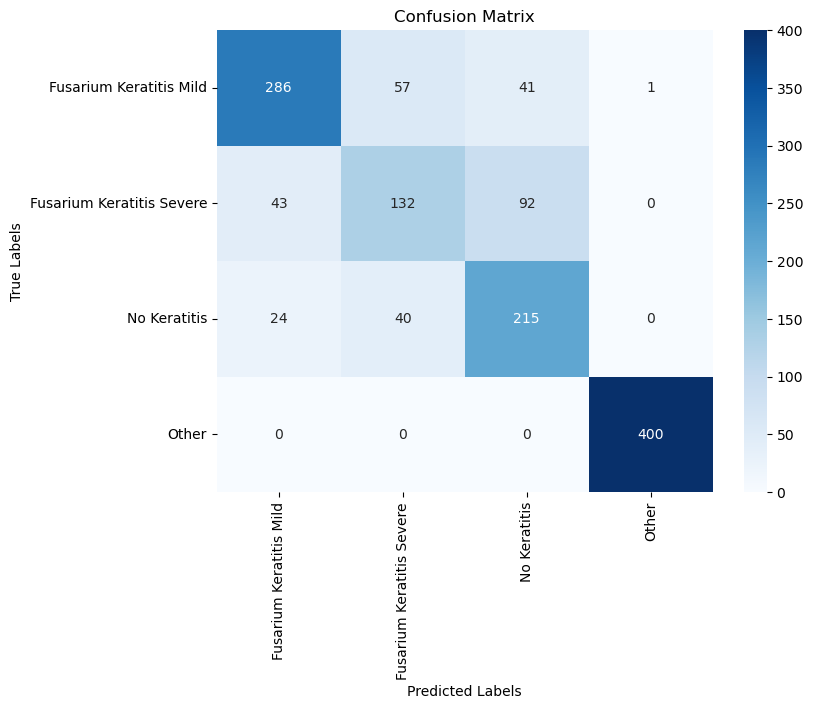

In [18]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

print(classification_report(y_true_classes, y_pred_classes, target_names=label_encoder.classes_))

cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


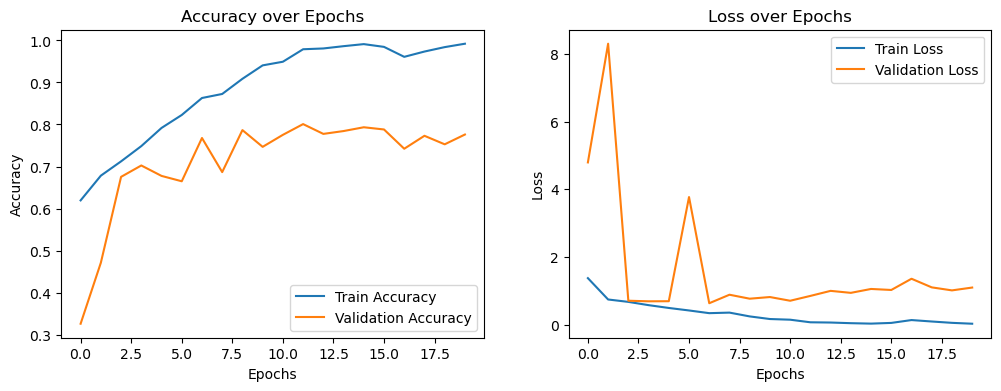

In [19]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


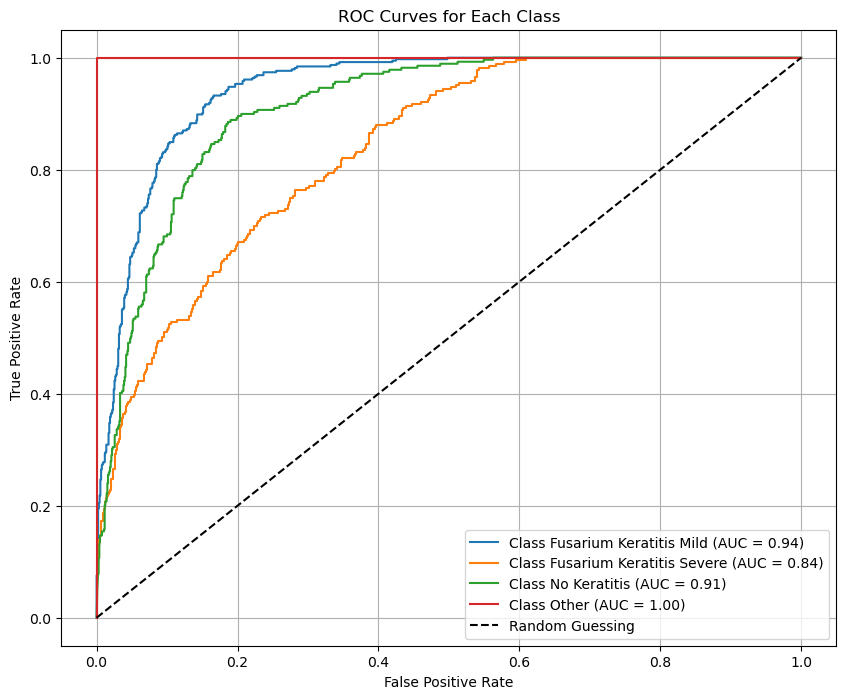

In [20]:
plt.figure(figsize=(10, 8))
for i in range(NUM_CLASSES):
    fpr, tpr, _ = roc_curve(y_test[:, i], y_pred[:, i])
    auc = roc_auc_score(y_test[:, i], y_pred[:, i])
    plt.plot(fpr, tpr, label=f"Class {label_encoder.classes_[i]} (AUC = {auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing")
plt.title("ROC Curves for Each Class")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.show()


1/1 [==============================] - 0s 110ms/step


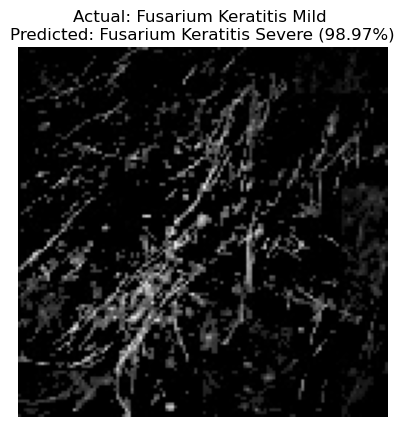

In [21]:
example_index = 0  
example_image = np.expand_dims(X_test[example_index], axis=0)
example_prediction = model.predict(example_image)
predicted_class = np.argmax(example_prediction, axis=1)[0]
predicted_label = label_encoder.inverse_transform([predicted_class])[0]

plt.imshow(X_test[example_index])
plt.axis("off")

actual_class = np.argmax(y_test[example_index])
actual_label = label_encoder.inverse_transform([actual_class])[0]

plt.title(f"Actual: {actual_label} \nPredicted: {predicted_label} ({np.max(example_prediction) * 100:.2f}%)")
plt.show()


In [23]:
def predict_image(image_path, model, label_encoder):
    # Load image
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=IMAGE_SIZE)
    img_array = tf.keras.preprocessing.image.img_to_array(img) / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions for model input

    # Predict
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction, axis=1)[0]
    predicted_label = label_encoder.inverse_transform([predicted_class])[0]

    # Display Image & Prediction
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Predicted: {predicted_label} ({np.max(prediction) * 100:.2f}%)")
    plt.show()


1/1 [==============================] - 0s 46ms/step


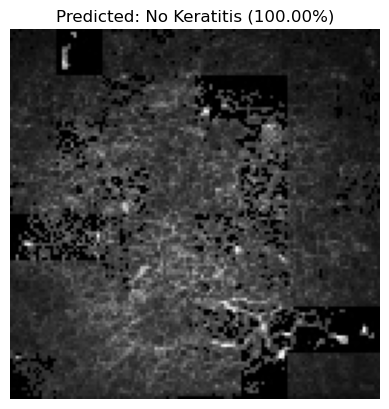

In [24]:
image_path = "C:\\Users\\prart\\Downloads\\FINAL DATASET\\FINAL DATASET\\No Keratitis\\Mucor_mild_Y_201507302OS_9.jpg"  # Replace with your image path
predict_image(image_path, model, label_encoder)


1/1 [==============================] - 0s 52ms/step


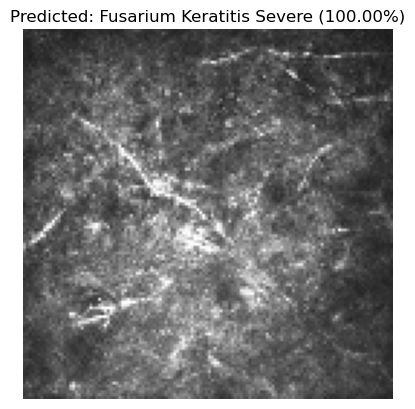

In [25]:
image_path = "C:\\Users\\prart\\Downloads\\FINAL DATASET\\FINAL DATASET\\Fusarium Keratitis Severe\\Fusarium_severe_X_2018.04.27-OD_19.jpg"  # Replace with your image path
predict_image(image_path, model, label_encoder)


1/1 [==============================] - 0s 60ms/step


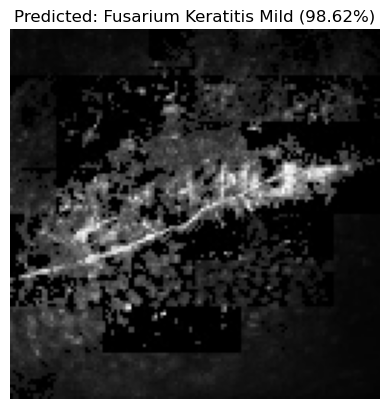

In [26]:
image_path = "C:\\Users\\prart\\Downloads\\FINAL DATASET\\FINAL DATASET\\Fusarium Keratitis Mild\\Fusarium_mild_V_OD20170406_402.jpg"  # Replace with your image path
predict_image(image_path, model, label_encoder)


1/1 [==============================] - 0s 63ms/step


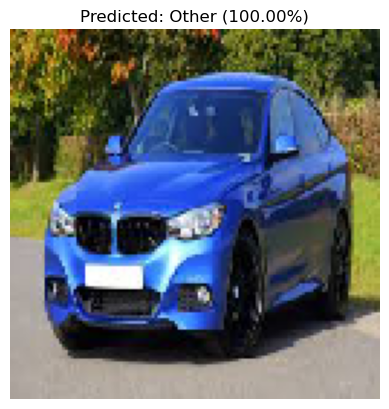

In [27]:
image_path = "C:\\Users\\prart\\Downloads\\car.jpeg"  # Replace with your image path
predict_image(image_path, model, label_encoder)

1/1 [==============================] - 0s 67ms/step


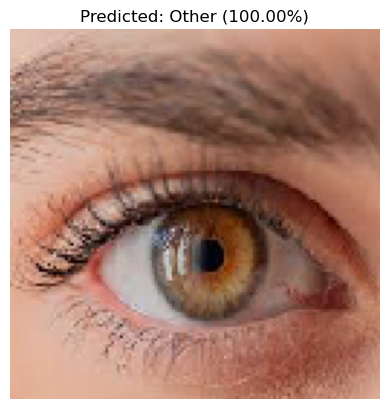

In [28]:
image_path = "C:\\Users\\prart\\Downloads\\eyes.jpeg"  # Replace with your image path
predict_image(image_path, model, label_encoder)

#Saved Model 

In [29]:
# Save model and label encoder
model.save("keratitis_classifier.h5")  # Save model in HDF5 format
import pickle
with open("label_encoder.pkl", "wb") as f:
    pickle.dump(label_encoder, f)  # Save label encoder
print("Model and label encoder saved successfully!")


C:\Users\prart\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model and label encoder saved successfully!


In [30]:
import shutil

# Save model and label encoder
model.save("keratitis_classifier.h5")
with open("label_encoder.pkl", "wb") as f:
    pickle.dump(label_encoder, f)

# Zip the files for downloading
shutil.make_archive("keratitis_model", 'zip', ".", "keratitis_classifier.h5")
shutil.make_archive("label_encoder", 'zip', ".", "label_encoder.pkl")

print("Model and label encoder saved. You can now download the 'keratitis_model.zip' and 'label_encoder.zip'.")


Model and label encoder saved. You can now download the 'keratitis_model.zip' and 'label_encoder.zip'.


In [31]:
from tensorflow.keras.models import load_model
import pickle

# Define model paths
model_path = "C:\\Users\\prart\\Downloads\\keratitis_model\\keratitis_classifier.h5"  # Update with your model path
label_encoder_path = "C:\\Users\\prart\\Downloads\\label_encoder\\label_encoder.pkl"  # Update with your label encoder path

# Load model
model = load_model(model_path)

# Load label encoder
with open(label_encoder_path, "rb") as f:
    label_encoder = pickle.load(f)

print("Model and label encoder loaded successfully!")


Model and label encoder loaded successfully!


In [32]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

def predict_image(image_path, model, label_encoder):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
    img_array = tf.keras.preprocessing.image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions

    # Predict
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction, axis=1)[0]
    predicted_label = label_encoder.inverse_transform([predicted_class])[0]

    # Show result
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Predicted: {predicted_label} ({np.max(prediction) * 100:.2f}%)")
    plt.show()


In [33]:
image_path = "C:\\Users\\prart\\Downloads\\FINAL DATASET\\FINAL DATASET\\Fusarium Keratitis Severe\\Fusarium_severe_X_2018.04.27-OD_19.jpg"  # Replace with your image path
predict_image(image_path, model, label_encoder)

ValueError: in user code:

    File "C:\Users\prart\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\prart\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\prart\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\prart\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 2381, in predict_step
        return self(x, training=False)
    File "C:\Users\prart\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\prart\anaconda3\Lib\site-packages\keras\src\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "model" is incompatible with the layer: expected shape=(None, 128, 128, 3), found shape=(None, 224, 224, 3)
